<a href="https://colab.research.google.com/github/Jasmine-kaur8/Advertising_project/blob/main/Advertising_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising(project 6).csv to Advertising(project 6).csv


uploaded the data.

In [43]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge


imported necessary libraries.

In [4]:
#reading the data

data = pd.read_csv('Advertising(project 6).csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


first 5 rows of the data.

In [5]:
data.drop('Unnamed: 0' , axis = 1, inplace = True)

drop the column unnamed as it is not required.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


All the columns are float.

In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The description of the data shows that there are outliers in the newspaper column. Very low minimum value is not a problem because it can be optimal strategy to spend on a particular channel.

In [8]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

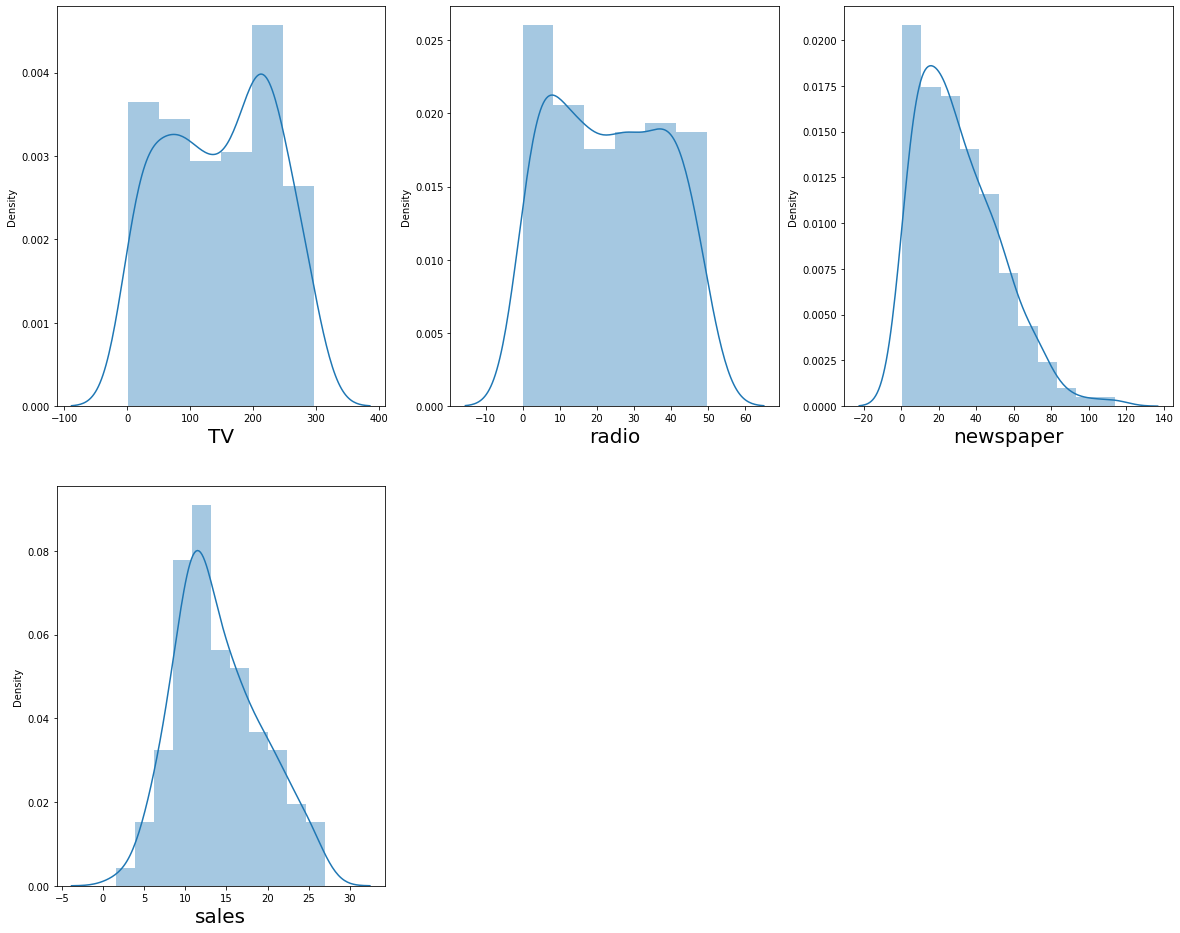

In [16]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(3,3,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The newspaper column is skewed.

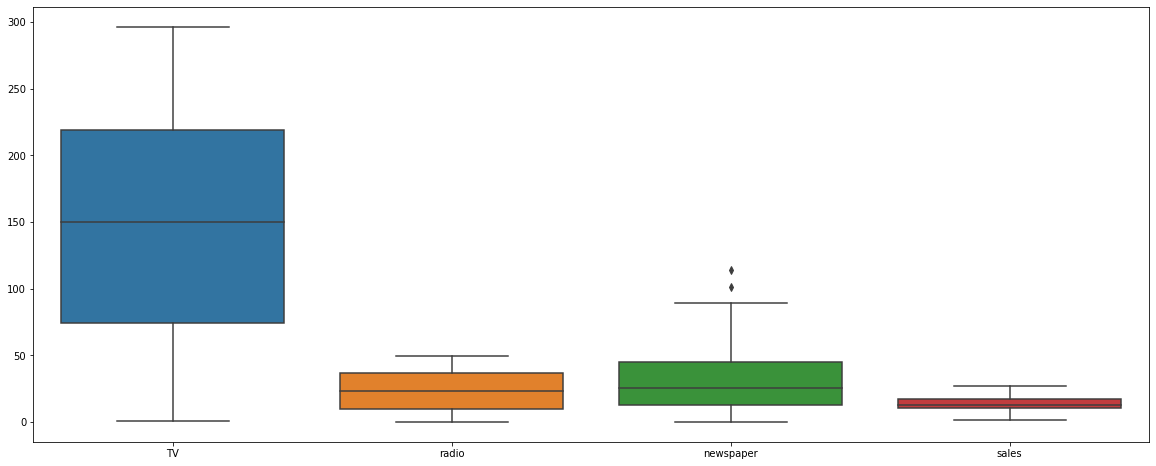

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data, ax=ax)
plt.show()

The boxplot shows there are outliers in the newspaper column.

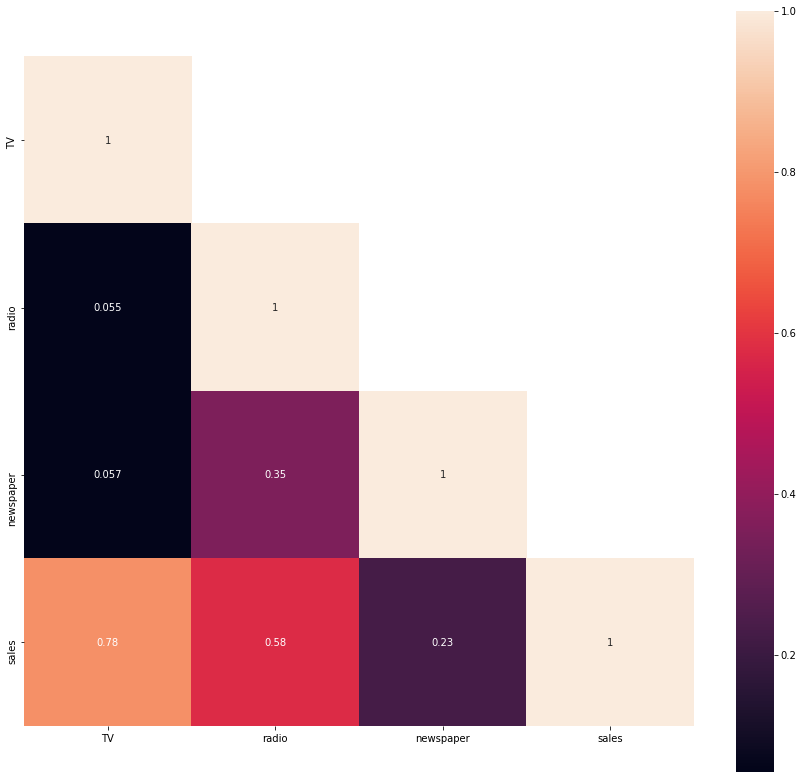

In [11]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(15,14)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

There is no evidence of any two features being correlated to each other. There seems a good relationship between dependent variable and independent variables.

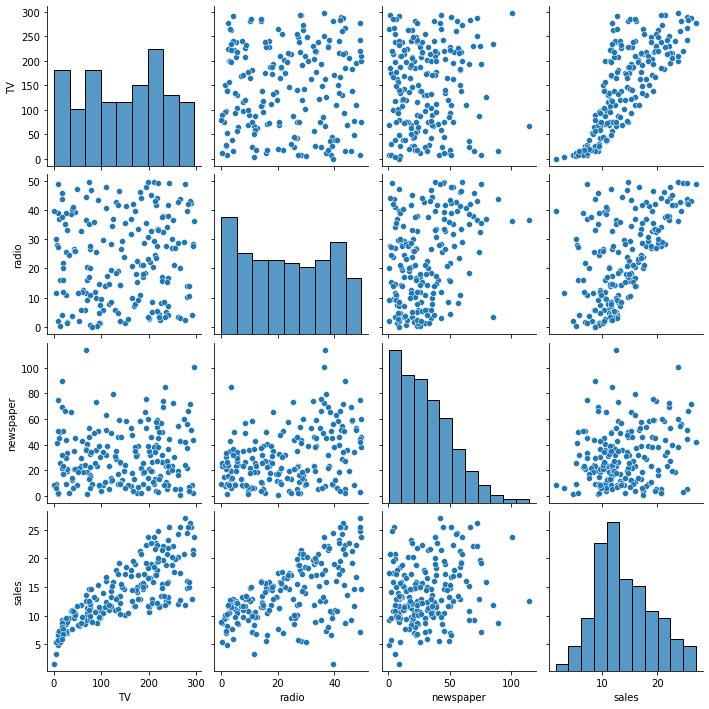

In [15]:
sns.pairplot(data)

There doesnot appear any correlation between features. All the independent variables are related to the dependent variable.

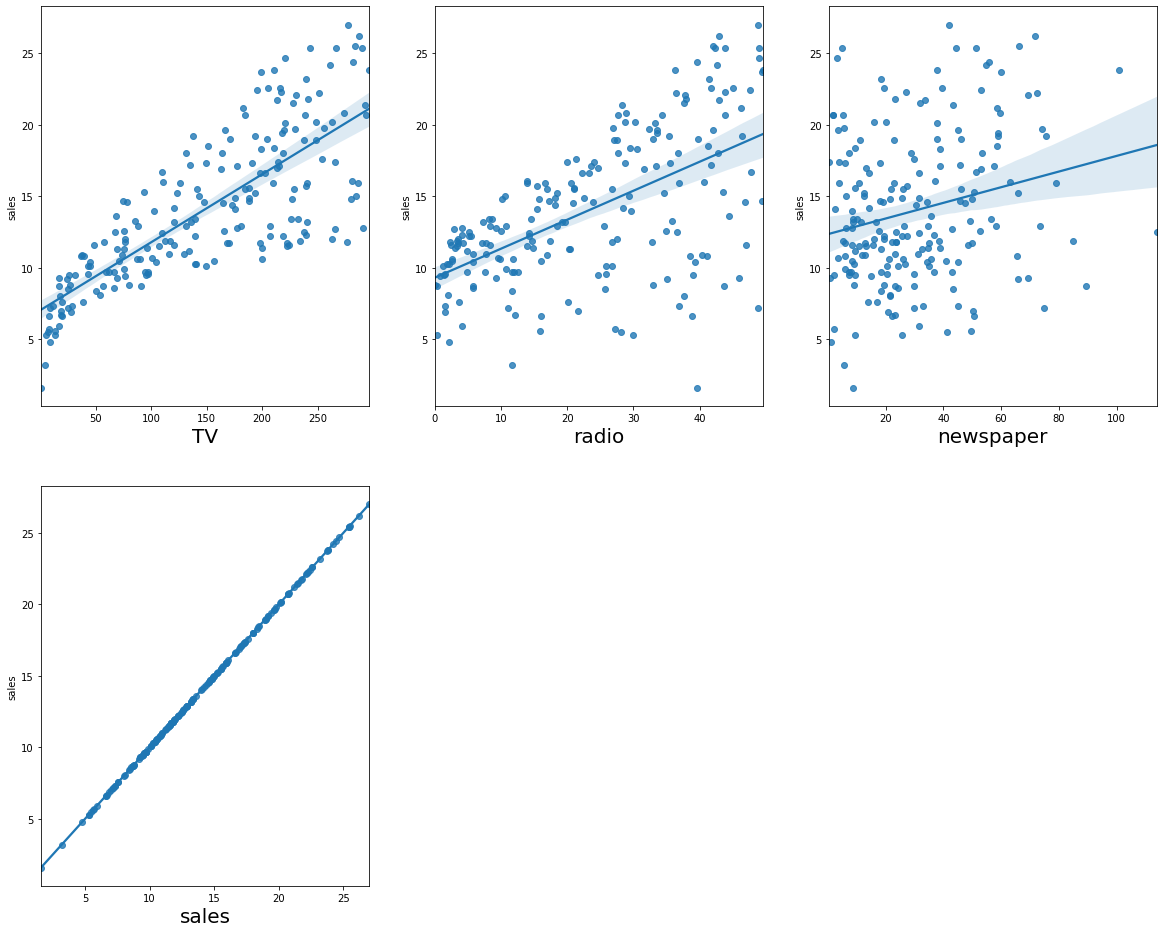

In [18]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(3,3,graph)
    sns.regplot(x = data[column], y = 'sales', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The advertising channel  that is related to the sales the most is TV. After that it is radio and comparitively the least is newspaper.

In [20]:
#treating the outliers:

# finding out the quantile of data
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", data1.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-data1.shape[0])/data.shape[0])

shape before and after
shape before         : (200, 4)
shape after          : (198, 4)
Percentage Loss      : 0.01


Only 1% data is lost after applying IQR. So, we can remove these outlier by using IQR.

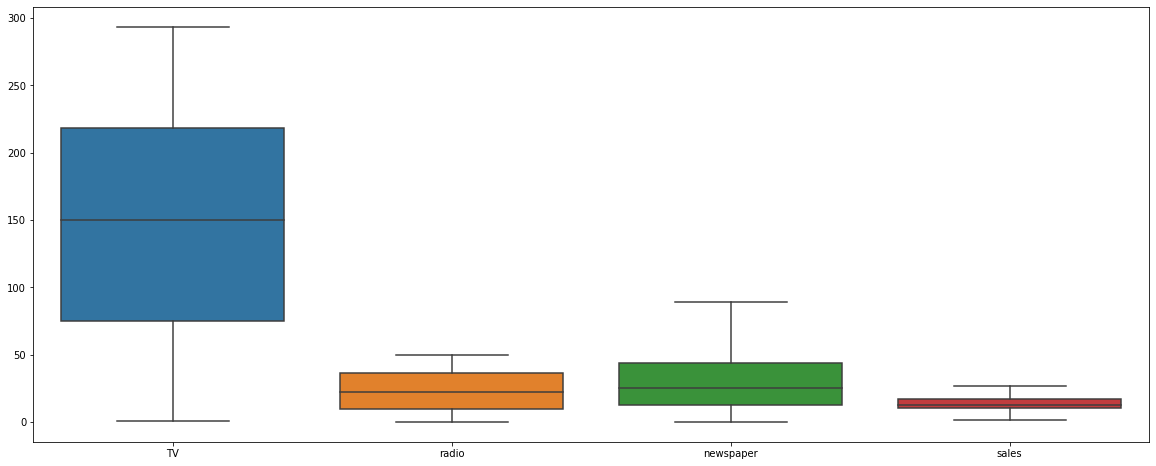

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data1, ax=ax)
plt.show()

The boxplot shows that the outliers have been removed from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

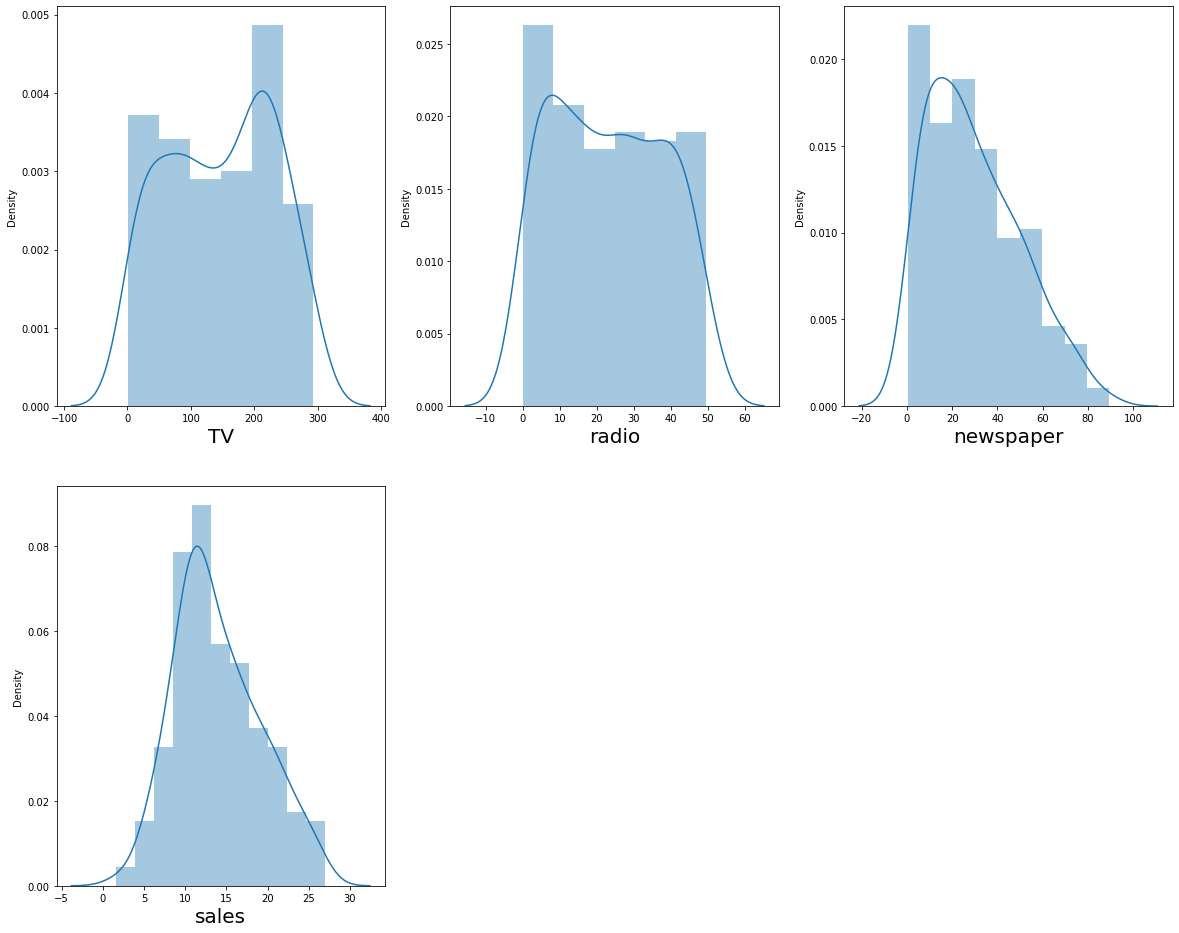

In [29]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(3,3,graph)
    sns.distplot(data1[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The data is very less skewed.

In [39]:
#applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data1)

Applied standard scaler.

In [40]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data1.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,TV,6.400006
1,radio,3.918212
2,newspaper,1.137836
3,sales,9.559473


All the vif values are less than 10, this implies there is no multicollinearity.

In [41]:
#spliting the dependent and independent variable

X = data1.drop('sales', axis = 1)
Y = data1['sales']

the data is divided.

In [44]:
#model building

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=35)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df


,Modelling Algorithm,r2 score,MSE
0,LR,0.913905,2.019740
1,RF,0.984183,0.371065
2,KNN,0.922396,1.820525
3,GB,0.982771,0.404169


Trained the model. The r2 score and mse are calculated.

In [45]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=35)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 3, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.885361
1,RF,0.976091
2,KNN,0.910522
3,GB,0.978095


Applied cross validation. The cross validation score is recored after cross validation.

In [46]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.913905,0.885361,0.028544
1,RF,0.984183,0.976091,0.008091
2,KNN,0.922396,0.910522,0.011875
3,GB,0.982771,0.978095,0.004677


The difference is calculated between the r2 score and the cv score. The algorithm that has the least difference is gradient boosting refressor.

In [54]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion' : ('friedman_mse', 'mse', 'mae'),
    'learning_rate' : [0.1,0.2,0.25],
    'min_samples_split' : range(2,14,2),
    'max_features' : ('auto', 'sqrt', 'log2'),
    'max_depth' : range(1,8,2)
}




>applied hyperparameter tuning.



In [55]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_param)

Applied grid search CV.

In [56]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

Trained the model.

In [57]:
best_parameters = grid.best_params_
print(best_parameters)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 12}


Recieved the best parameters.

In [61]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingRegressor:

gb =  GradientBoostingRegressor(criterion = 'friedman_mse', learning_rate = 0.1, max_depth = 7, max_features = 'auto', min_samples_split = 12)

gb.fit(X_train, y_train)
pred = gb.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.9782753502431447

The final model is built.

In [62]:
#SAVING THE MODEL:

import joblib
joblib.dump(gb, 'advertising_final_model.pkl')

['advertising_final_model.pkl']

Saved the model.